# MODELO DE CLASIFICACIÓN

# ENFERMEDADES CARDIOVASCULARES

#### Importar librerías

In [245]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
#Librerías para visualizar el arbol de decisión
import matplotlib.pyplot as plt
from sklearn import tree

#### Carga de datos

In [248]:
# Se cargan los datos. 
data = pd.read_excel(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MODELOS PREDICTIVOS CON ML PYTHON ejercicios\5. Ejercicio clasificación enfermedades cardiovasculares\Enfermedad_Cardiovascular_Dataset.xlsx')

In [250]:
# Cantidad de datos y número de variables
data.shape

(67976, 13)

In [252]:
# Mostrar los datos
data.head()

,Id,Edad,Género,Altura,Peso,Presion sistólica,Presión diastólica,Colesterol,Glucosa,Fumador,Alcohol,Activo,ECV
0,0,53,M,168,62.0,110,80,Normal,Normal,NO,NO,SI,NO
1,1,58,F,156,85.0,140,90,Muy elevado,Normal,NO,NO,SI,SI
2,2,54,F,165,64.0,130,70,Muy elevado,Normal,NO,NO,NO,SI
3,3,50,M,169,82.0,150,100,Normal,Normal,NO,NO,SI,SI
4,4,50,F,156,56.0,100,60,Normal,Normal,NO,NO,NO,NO


In [254]:
# Borrar columna Id
data = data.drop(columns=['Id'])

#### Descripción de los datos

In [257]:
# Se realiza el perfilamiento de los datos. Se genera información de tipo descriptivo para cada una de las variables numéricas.
data.describe()

,Edad,Altura,Peso,Presion sistólica,Presión diastólica
count,67976.000000,67976.000000,67976.000000,67976.000000,67976.000000
mean,55.627913,164.555829,74.392564,126.731611,81.458794
std,7.047183,7.751991,14.032135,16.706251,9.624818
min,31.000000,140.000000,48.000000,70.000000,50.000000
25%,50.000000,159.000000,65.000000,120.000000,80.000000
50%,56.000000,165.000000,72.000000,120.000000,80.000000
75%,61.000000,170.000000,82.000000,140.000000,90.000000
max,68.000000,198.000000,183.000000,240.000000,190.000000


In [259]:
# Categorías que se presentan en la variable categórica "Género" y en qué proporción.
pd.Series(data['Género']).value_counts()

Género
F    44073
M    23849
Name: count, dtype: int64

In [261]:
# Categorías que se presentan en la variable categórica "Colesterol" y en qué proporción.
pd.Series(data['Colesterol']).value_counts()

Colesterol
Normal         50950
Elevado         9197
Muy elevado     7829
Name: count, dtype: int64

In [263]:
# Categorías que se presentan en la variable categórica "Glucosa" y en qué proporción.
pd.Series(data['Glucosa']).value_counts()

Glucosa
Normal         57759
Muy elevado     5191
Elevado         5026
Name: count, dtype: int64

In [265]:
# Categorías que se presentan en la variable categórica "Fumador" y en qué proporción.
pd.Series(data['Fumador']).value_counts()

Fumador
NO    61959
SI     6017
Name: count, dtype: int64

In [267]:
# Categorías que se presentan en la variable categórica "Alcohol" y en qué proporción.
pd.Series(data['Alcohol']).value_counts()

Alcohol
NO    64314
SI     3662
Name: count, dtype: int64

In [269]:
# Categorías que se presentan en la variable categórica "Activo" y en qué proporción.
pd.Series(data['Activo']).value_counts()

Activo
SI    54604
NO    13372
Name: count, dtype: int64

In [271]:
# Categorías que se presentan en la variable categórica "ECV" y en qué proporción.
pd.Series(data['ECV']).value_counts()

ECV
NO    34190
SI    33786
Name: count, dtype: int64

#### Limpieza y preparación de los datos

In [274]:
# Ver los valores nulos
data.isna().sum()

Edad                   0
Género                54
Altura                 0
Peso                   0
Presion sistólica      0
Presión diastólica     0
Colesterol             0
Glucosa                0
Fumador                0
Alcohol                0
Activo                 0
ECV                    0
dtype: int64

In [276]:
# Ver los duplicados
data.duplicated().sum()

3405

In [278]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data

In [280]:
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

In [282]:
# Cantidad de datos y número de variables
data_t.shape

(64517, 12)

In [284]:
# Transformación de las variables categóricas de entrada
data_t = pd.get_dummies(data_t, columns=['Género','Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Activo'])

In [286]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Aunque la representación de esta 
# variable sea numérica, la tarea a resolver seguirá siendo una clasificación.
# Primero tenemos que generar el objeto.
codificacion = LabelEncoder()

In [288]:
# Ahora se ajusta a los datos.
data_t['ECV']=codificacion.fit_transform(data_t['ECV'])

In [290]:
# Visualización de la clase. Observamos que ahora la categoría "SI" está codificada con un "1" y la clase "NO" con un "0"
data_t['ECV'].value_counts()

ECV
1    32913
0    31604
Name: count, dtype: int64

In [292]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,Edad,Altura,Peso,Presion sistólica,Presión diastólica,ECV,Género_F,Género_M,Colesterol_Elevado,Colesterol_Muy elevado,Colesterol_Normal,Glucosa_Elevado,Glucosa_Muy elevado,Glucosa_Normal,Fumador_NO,Fumador_SI,Alcohol_NO,Alcohol_SI,Activo_NO,Activo_SI
0,53,168,62.0,110,80,0,False,True,False,False,True,False,False,True,True,False,True,False,False,True
1,58,156,85.0,140,90,1,True,False,False,True,False,False,False,True,True,False,True,False,False,True
2,54,165,64.0,130,70,1,True,False,False,True,False,False,False,True,True,False,True,False,True,False
3,50,169,82.0,150,100,1,False,True,False,False,True,False,False,True,True,False,True,False,False,True
4,50,156,56.0,100,60,0,True,False,False,False,True,False,False,True,True,False,True,False,True,False


In [294]:
# Cantidad de datos y número de variables
data_t.shape

(64517, 20)

#### Construcción del modelo sin búsqueda de hiperparámetros

In [297]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['ECV']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['ECV'], axis=1)

In [299]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [301]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [303]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)

In [305]:
# Podemos determinar la exactitud del modelo sobre los datos de test, para determinar su rendimiento de generalización. Esta, y
# otras métricas las estudiaremos en las siguientes lecciones.
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))

Exactitud: 0.62


In [307]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [309]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[3785, 2459],
       [2475, 4185]], dtype=int64)

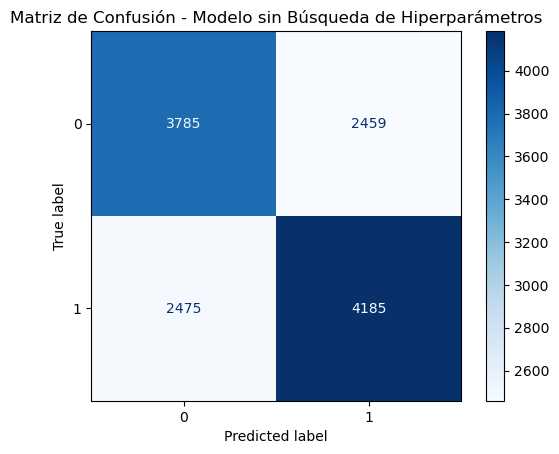

In [311]:
# Graficar la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo sin Búsqueda de Hiperparámetros')
plt.show()

In [313]:
# Imprimir las métricas
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.62
Recall: 0.6283783783783784
Precisión: 0.6298916315472607
Puntuación F1: 0.6291340950090198


In [315]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      6244
           1       0.63      0.63      0.63      6660

    accuracy                           0.62     12904
   macro avg       0.62      0.62      0.62     12904
weighted avg       0.62      0.62      0.62     12904



In [317]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía. Se indica que mejore el balance de clases (aunque no es 
# necesario, pues en este caso están bien balanceados los datos)
arbol = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      6244
           1       0.63      0.63      0.63      6660

    accuracy                           0.62     12904
   macro avg       0.62      0.62      0.62     12904
weighted avg       0.62      0.62      0.62     12904



#### Interpretación del modelo

In [319]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el cual nos devuelve 
# un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable asociada.
importancia= arbol.feature_importances_
importancia

array([0.16165922, 0.21202454, 0.24124595, 0.19072973, 0.05234927,
       0.01459254, 0.01332403, 0.00806921, 0.01494823, 0.01398352,
       0.00919013, 0.00778088, 0.01025373, 0.00788978, 0.00760933,
       0.0049594 , 0.00563653, 0.01326058, 0.01049341])

In [321]:
# Ver en orden de importancia
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Peso,0.241246
1,Altura,0.212025
2,Presion sistólica,0.190730
3,Edad,0.161659
4,Presión diastólica,0.052349
5,Colesterol_Muy elevado,0.014948
6,Género_F,0.014593
7,Colesterol_Normal,0.013984
8,Género_M,0.013324
9,Activo_NO,0.013261


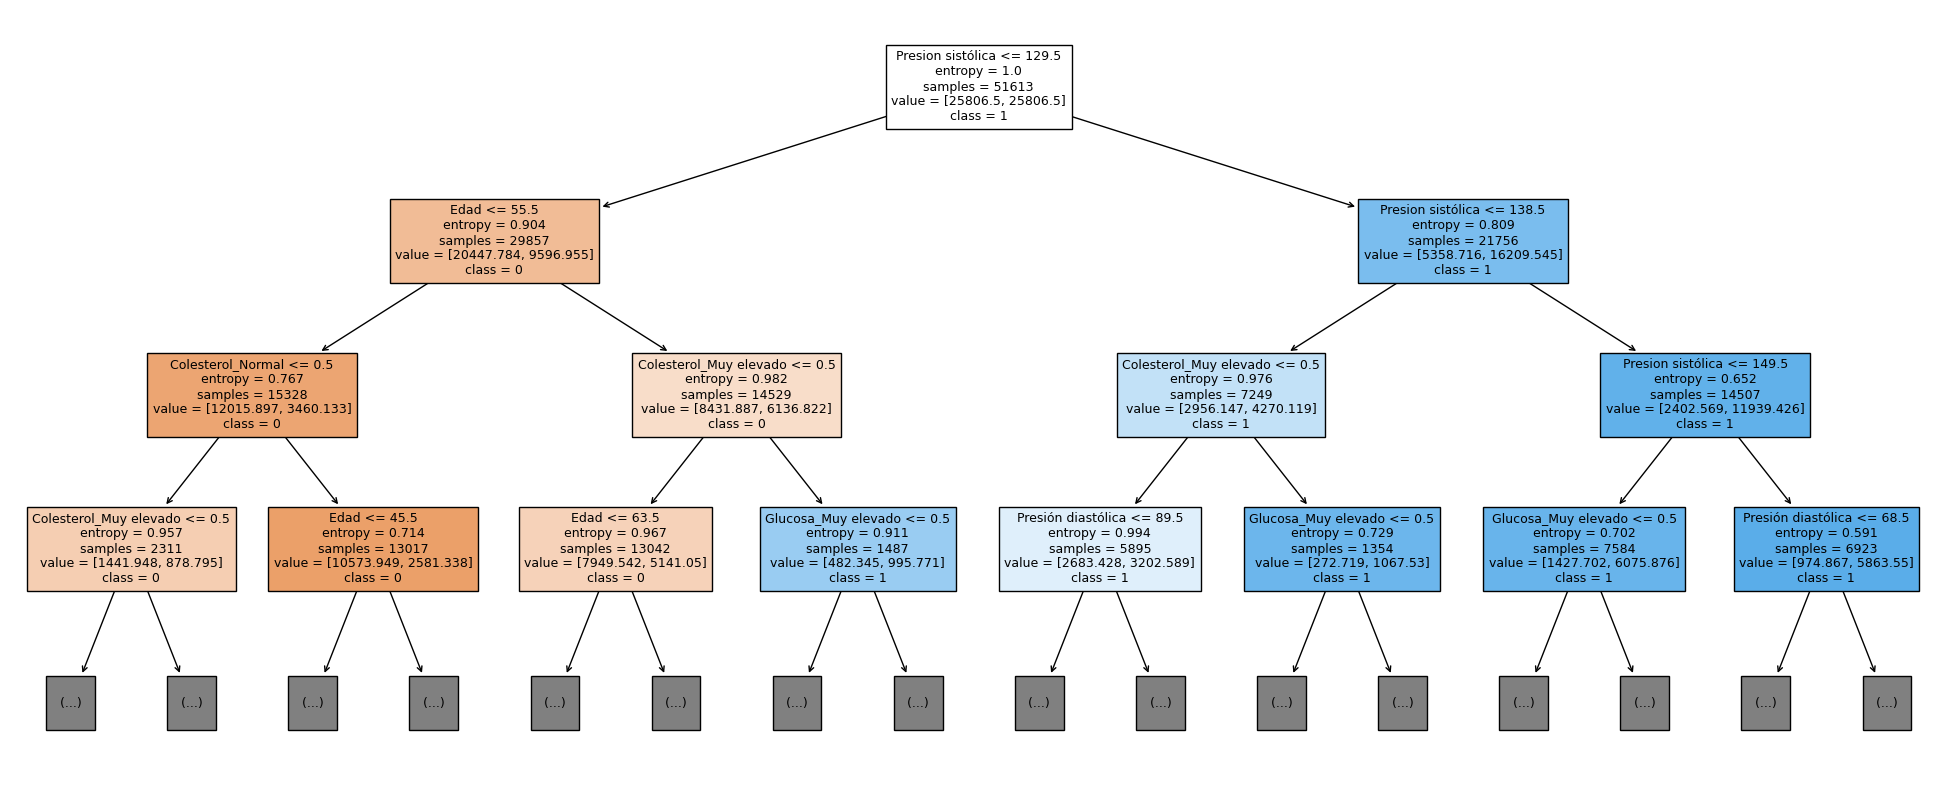

In [323]:
# Graficar el árbol, con profundidad máxima de 3
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [ ]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decistion_tree.png")

#### Construcción de modelo con hiperparámetros

In [325]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt

#### Modelo con hiperparámetros

En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno

Para determinar los mejores valores de estos hiperparámetros vamos a realizar la búsqueda utilizando la función GridSearchCV.SearchCV.

In [327]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [329]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10],'min_samples_split':[2, 3, 4, 5]}

In [347]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [349]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5]})

In [351]:
# Podemos ver cual fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [353]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[4854, 1390],
       [2208, 4452]], dtype=int64)

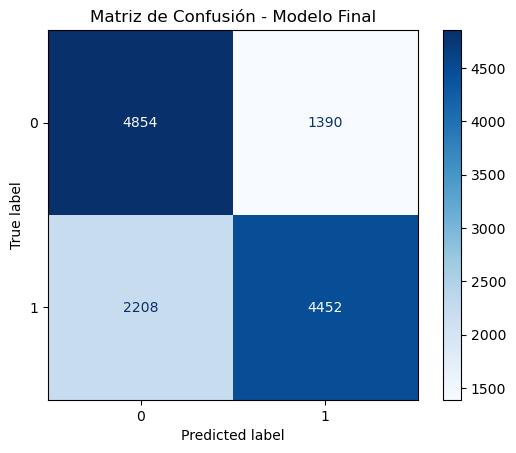

In [355]:
# Graficar la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo Final')
plt.show()

In [357]:
# Imprimir las métricas
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.72
Recall: 0.6684684684684684
Precisión: 0.7620677850051353
Puntuación F1: 0.7122060470324748


In [359]:
# Obtener el mejor modelo.
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
# # Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6244
           1       0.76      0.67      0.71      6660

    accuracy                           0.72     12904
   macro avg       0.72      0.72      0.72     12904
weighted avg       0.73      0.72      0.72     12904



#### Interpretación del modelo

In [361]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el cual nos devuelve 
# un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable asociada.
importancia= modelo_final.feature_importances_
importancia

array([1.19334269e-01, 3.29625529e-03, 1.00025557e-02, 7.69598962e-01,
       8.76309078e-03, 0.00000000e+00, 4.47761854e-04, 3.56184601e-03,
       6.98639203e-02, 0.00000000e+00, 0.00000000e+00, 7.60863003e-03,
       0.00000000e+00, 3.48939907e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.03330988e-03])

In [363]:
# Ver en orden de importancia
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Presion sistólica,0.769599
1,Edad,0.119334
2,Colesterol_Muy elevado,0.069864
3,Peso,0.010003
4,Presión diastólica,0.008763
5,Glucosa_Muy elevado,0.007609
6,Activo_SI,0.004033
7,Colesterol_Elevado,0.003562
8,Fumador_NO,0.003489
9,Altura,0.003296


#### Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [365]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba". Con eso predecimos cuál es la probabilidad de que el dato
# en la pocisión 20 (el paciente número 21) tenga una enfermedad cardiovascular ECV.
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [367]:
# Esto me dice que tiene un 61,4% de probabilidad de no tener ECV y un 38,5% de probabilidad de tener ECV.
print(y_pred_test)

[[0.61434838 0.38565162]]


In [369]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_
# Esto quiere decir que los datos están ordenados en clase 0 (no ECV) y 1 (ECV)

array([0, 1])

## ¿Cuál modelo tiene mejor rendimiento de generalización?: 

EL MODELO CON HIPERPARÁMETROS {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

Exactitud: 0.72

Recall: 0.6684684684684684

Precisión: 0.7620677850051353

Puntuación F1: 0.7122060470324748

## ¿Cuáles son las siete variables más importantes que seleccionó cada modelo? 

SIN HIPERPARÁMETROS: 

Peso 0.241246

Altura 0.212025, 

Presion sistólica 0.190730, 

Edad 0.161659, 

Presión diastólica 0.052349, 

Colesterol_Muy elevado 0.014948

Género_F 0.014593


CON HIPERPARÁMETROS

Presion sistólica 0.769599

Edad 0.119334

Colesterol_Muy elevado 0.069864

Peso 0.010003

Presión diastólica 0.008763

Glucosa_Muy elevado 0.007609

Activo_SI 0.004033

## ¿Hay diferencias en esta selección? Si es así, ¿cuál podría ser la razón?

Se debe principalmente a que la estructura del árbol cambia según los hiperparámetros, y por tanto, cambia la forma en que las variables se usan para dividir los datos.

Razones por las que cambia la importancia de las variables:

* Estructura del árbol diferente:

Un árbol sin ajustar puede ser muy profundo o muy simple, dependiendo de los valores por defecto.

Un árbol con hiperparámetros ajustados (como max_depth, min_samples_split, max_features, etc.) construye una estructura diferente, posiblemente más equilibrada o más generalizable.

* Selección de variables en los nodos:

La importancia de una variable en un árbol se calcula en función de cuánto reduce la impureza (como Gini o entropía) cuando se usa para dividir datos.

Si el árbol cambia de forma (por ejemplo, poda ramas profundas o limita su crecimiento), también puede cambiar qué variables se usan más arriba en el árbol, donde tienen mayor impacto.

* Overfitting vs. generalización:

El árbol sin tuning puede sobreajustarse y usar variables poco relevantes solo porque se ajustan bien a los datos de entrenamiento.

El árbol ajustado busca generalizar mejor, usando solo las variables más útiles según la validación cruzada.

* Interacción entre variables:

El árbol con hiperparámetros puede captar interacciones diferentes entre variables que el otro no capta, lo cual también cambia las ramas y la importancia asignada a cada variable.


La importancia de variables no es fija; depende del modelo, su estructura, y cómo este utiliza las variables para lograr su clasificación. Por eso, al cambiar los hiperparámetros y reentrenar el modelo, se puede cambiar completamente la jerarquía de importancia de las variables.